In [4812]:
#%% neo python (one time install)
#! pip install neo
#%% allen brain institute (one time install)
#pip install git+git://github.com/BlueBrain/eFEL

In [2493]:
#%%
from neo import io
import numpy as np
import matplotlib.pyplot as plt
import efel
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
import scipy.optimize as opt       # root-finding algorithm
import pyabf
import seaborn as sns
import os.path
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

In [2494]:
# %% you can see all the features here
# efel.getFeatureNames()

In [2495]:
#%% define the path to long suares
# a trace with a test pulse
resting_potential = -60 # the one you wrote in the notebook
# Capacitance_observed = 9 # the one you wrote in the notebook
file_L ="B6J_6608_PFC_LC_hCHR2__0083" # LONG
# file_R ="\\B6J_6590_PFC_LC__0004" # RAMP
# file_S ="\\DHC_0052_LC_Shristi_0015" #SHORT

path = r'C:\Users\shossein\Desktop\New folder\2022\May\24.05.2022'
save_path = r'C:\Users\shossein\Desktop\New folder\2022\May\24.05.2022\Cell_7' # DEFINE the file directory for saving

################################
#%% Exporting data to Excell for analysis
writer = pd.ExcelWriter(os.path.join(save_path, file_L  +'.xlsx'))
#####################################################

#Long-Square I-V traces
file_nameL = path + "\\" + file_L +'.abf'
abfL = pyabf.ABF(path + "\\" + file_L +'.abf')
#Take alook at the data
print(abfL)


# ## ramp I-V traces
# abfR = pyabf.ABF(path + file_R +'.abf')
# print(abfR)

# ## short I-V traces
# file_nameS = path + file_S +'.abf'
# abfS = pyabf.ABF(path + file_S +'.abf')
# print(abfS)

# # path = 'THC_1154_CeA_Cronos_07122020_0022.abf'



ABF (v2.9) with 2 channels (pA, pA), sampled at 20.0 kHz, containing 16 sweeps, having no tags, with a total length of 0.26 minutes, recorded with protocol "CC_longSquare_IV_ABA".


In [2496]:
# r = io.AxonIO(filename=file_nameS)
# bl = r.read_block(lazy=False)

# data = []
# for trace in bl.segments:
    
#     # The voltage is already in mV 
#     voltage = np.array(trace.analogsignals[0]).flatten()
    
#     # The current looks like it is in pA, let's put it in nA
#     current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
#     # Get the sampling frequency from the file and create the time series in ms
#     dt = 1. / int(trace.analogsignals[0].sampling_rate)
#     time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
#     data.append({'v': voltage,
#                  'i': current,
#                  't': time})


In [2497]:
# #%%
# # reohbase (the first current step at duration infinity(~~ 300 ms) which causes the neuron to fire)
# # setting for efel
# efel.setThreshold(-20.)
# efel.setIntSetting("strict_stiminterval", True)
# efel.setDoubleSetting('interp_step', 0.01)


# # Looking at the data, we see that the beginning and the end of the steps are at 264 and 564 ms respectively
# ton = 42.5
# toff = 50.5
# toff_leak = 25.
# # path to save the results


# # converting to ms
# ton_idx = int(ton / dt / 1e3)
# toff_idx = int(toff / dt / 1e3)
# toff_leak_idx =int(toff_leak / dt / 1e3)
# rheobase_sweep = 7   #DEFINE THE REOHBASE SWEEP



# leak_current = np.mean(trace['i'][:toff_leak_idx])*1e3 # pA
# #Rheobase = np.mean(trace['i'][ton_idx:toff_idx])*1e3 # pA
# fig, ax = plt.subplots(2, 1, figsize=(10, 6))


# for idx,trace in enumerate(data[0:rheobase_sweep]): #DEFINE THE REOHBASE SWEEP

    
#     # Let's set the stimulus_current of Efel, just in case we need it later
#     current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
#     efel.setDoubleSetting('stimulus_current', current_amplitude)
# Rheobase_short = (np.mean(trace['i'][ton_idx:toff_idx])*1e3) - (leak_current)   # pA

 



# for idx,trace in enumerate(data[0:rheobase_sweep]): #DEFINE THE REOHBASE SWEEP

    
#     # Let's set the stimulus_current of Efel, just in case we need it later
#     current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
#     efel.setDoubleSetting('stimulus_current', current_amplitude)

#     ax[0].plot(trace['t'], trace['v'])

#     ax[0].set_ylabel('Voltage (mv)')
#     ax[0].legend(['Rheobase: %5.1f (pA)'  % Rheobase_short])
    
    
#     ax[1].plot(trace['t'], trace['i']*1e3) # convert current to pA
    
#     ax[1].set_xlabel('Time (ms)')
#     ax[1].set_ylabel('Current (pA)')

#     fig.suptitle('I_V Trace')
#     # ax[0].legend(['Rheobase: %5.1f (pA)'  % Rheobase])
#     ax[1].legend(['Leak Current: %5.1f (pA)'  % leak_current])

# #     fig.savefig(os.path.join(save_path ,"I_V_Rheobase_Short.svg"))
# #     fig.savefig(os.path.join(save_path ,"I_V_Rheobase_Short.pdf"))

    
# fig.show()

In [2498]:
#%% loading the data
r = io.AxonIO(filename=file_nameL)
bl = r.read_block(lazy=False)

data = []
for trace in bl.segments:
    
    # The voltage is already in mV 
    voltage = np.array(trace.analogsignals[0]).flatten()
    
    # The current looks like it is in pA, let's put it in nA
    current = 1e-3 * np.array(trace.analogsignals[1]).flatten()
    
    # Get the sampling frequency from the file and create the time series in ms
    dt = 1. / int(trace.analogsignals[0].sampling_rate)
    time = 1e3 * dt * np.asarray([i for i in range(len(voltage))])
    
    data.append({'v': voltage,
                 'i': current,
                 't': time})


the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


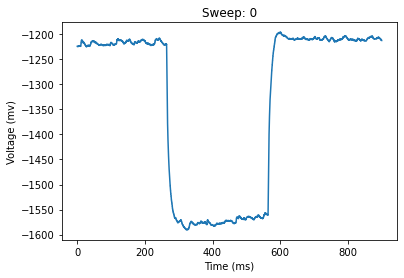

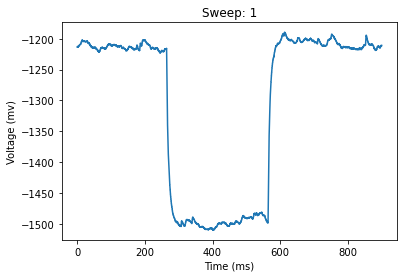

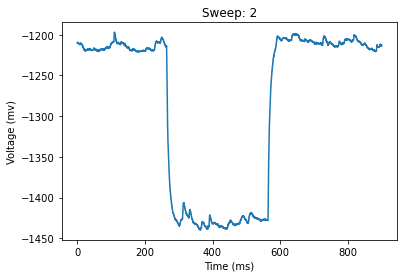

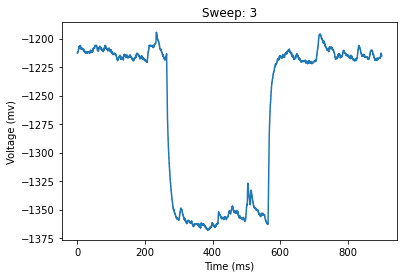

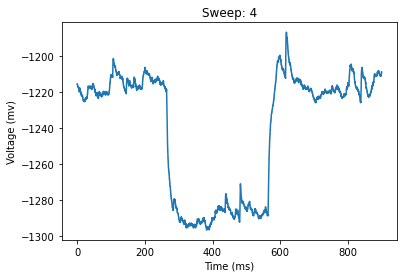

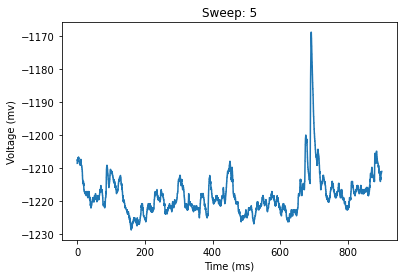

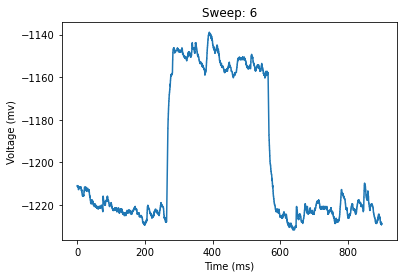

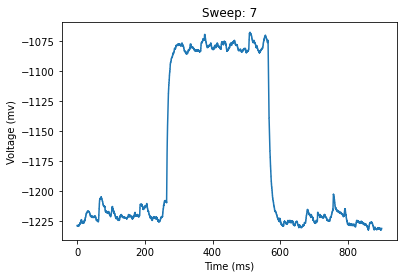

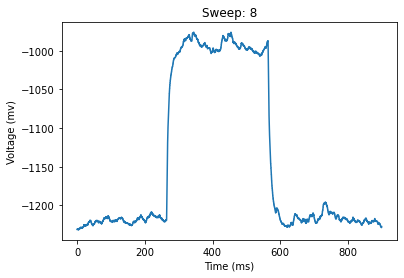

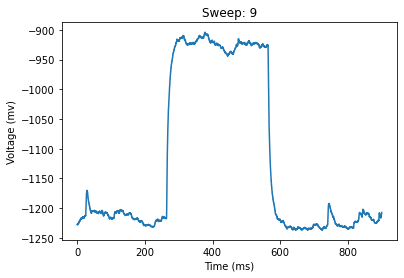

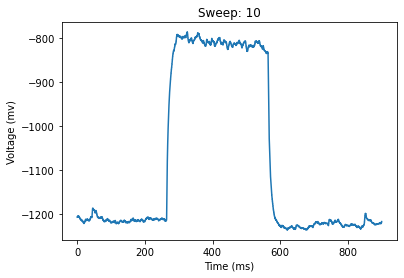

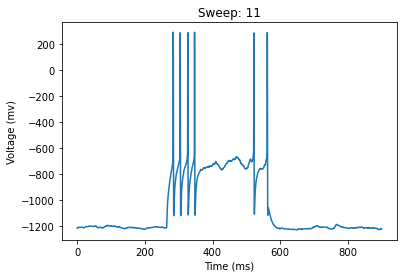

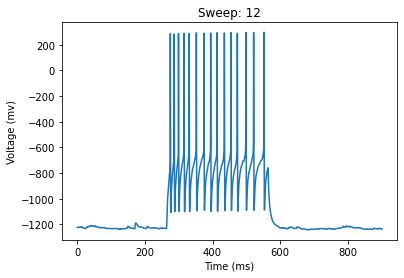

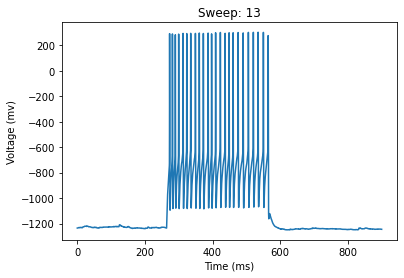

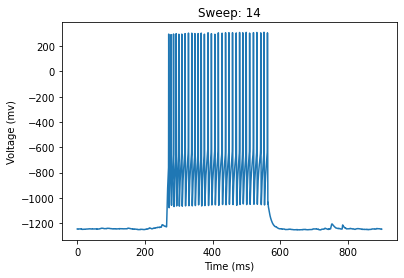

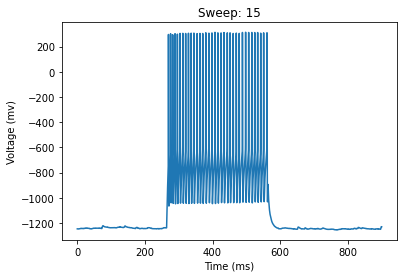

In [2499]:
#%% LOOKING AT THE DATA
# all traces
efel.setThreshold(-20.)
efel.setIntSetting("strict_stiminterval", True)

fel_vals = []

# Looking at the data, we see that the beginning and the end of the steps are at 264 and 564 ms respectively
ton = 264.
toff = 565.

# converting to ms
ton_idx = int(ton / dt / 1e3)
toff_idx = int(toff / dt / 1e3)



for idx,trace in enumerate(data[0:]):

    
    # Let's set the stimulus_current of Efel, just in case we need it later
    current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
    efel.setDoubleSetting('stimulus_current', current_amplitude)
    
     # Get the e-features
    interesting_efeatures = ['AP_amplitude', 'AP_begin_voltage', 'AHP_depth', 'AP_width', 
                             'AP_fall_time','AP_rise_time', 'Spikecount', 'spike_width2', 
                             'AP_width', 'spike_half_width', 'peak_time', 'peak_voltage', 
                             'AP_begin_time', 'AP_begin_width', 'mean_frequency','voltage_base',
                             'AHP_time_from_peak', 'AP_height', 'AHP_depth_abs',
                             'AHP_time_from_peak','voltage_deflection','AHP_time_from_peak']
    efel_trace = [{'T': trace['t'],
                   'V': trace['v'],
                   'stim_start': [ton],
                   'stim_end': [toff]}]
    fel_val = efel.getFeatureValues(efel_trace,
                                     interesting_efeatures,
                                     raise_warnings=False)[0]
    # fel_val_array = np.array(list(fel_val. items()))


    fel_vals.append(fel_val)
    
    plt.plot(trace['t'], trace['v'])
    plt.title('Sweep: %d' %idx)

    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mv)')


    plt.show()
    
    pd.DataFrame({f'sweep No. :{idx}': 
                  trace['t']}).to_excel(writer,sheet_name = 
                                                   'Time_Traces', startcol=idx,index=False)
    pd.DataFrame({f'sweep No. :{idx}': 
                  trace['v']}).to_excel(writer,sheet_name = 
                                                    'Voltage_Traces', startcol=idx, index=False)



<ipython-input-2500-f5bb570b875b>:67: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



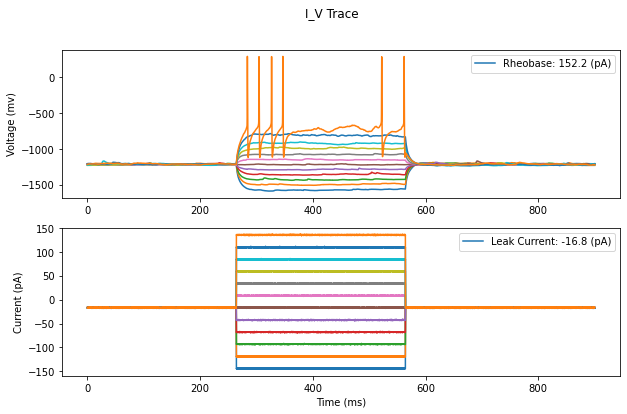

In [2500]:
#%%
# reohbase (the first current step at duration infinity(~~ 300 ms) which causes the neuron to fire)
# setting for efel
efel.setThreshold(-20.)
efel.setIntSetting("strict_stiminterval", True)
efel.setDoubleSetting('interp_step', 0.01)


# Looking at the data, we see that the beginning and the end of the steps are at 264 and 564 ms respectively
ton = 264.
toff = 564.
toff_leak = 240.
# path to save the results


# converting to ms
ton_idx = int(ton / dt / 1e3)
toff_idx = int(toff / dt / 1e3)
toff_leak_idx =int(toff_leak / dt / 1e3)
rheobase_sweep = 12   #DEFINE THE REOHBASE SWEEP



leak_current = np.mean(trace['i'][:toff_leak_idx])*1e3 # pA
#Rheobase = np.mean(trace['i'][ton_idx:toff_idx])*1e3 # pA
fig, ax = plt.subplots(2, 1, figsize=(10, 6))


for idx,trace in enumerate(data[0:rheobase_sweep]): #DEFINE THE REOHBASE SWEEP

    
    # Let's set the stimulus_current of Efel, just in case we need it later
    current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
    efel.setDoubleSetting('stimulus_current', current_amplitude)
Rheobase_long = (np.mean(trace['i'][ton_idx:toff_idx])*1e3) - (leak_current)   # pA

 



for idx,trace in enumerate(data[0:rheobase_sweep]): #DEFINE THE REOHBASE SWEEP

    
    # Let's set the stimulus_current of Efel, just in case we need it later
    current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
    efel.setDoubleSetting('stimulus_current', current_amplitude)

    ax[0].plot(trace['t'], trace['v'])

    ax[0].set_ylabel('Voltage (mv)')
    ax[0].legend(['Rheobase: %5.1f (pA)'  % Rheobase_long])
    
    
    ax[1].plot(trace['t'], trace['i']*1e3) # convert current to pA
    
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Current (pA)')

    fig.suptitle('I_V Trace')
    # ax[0].legend(['Rheobase: %5.1f (pA)'  % Rheobase])
    ax[1].legend(['Leak Current: %5.1f (pA)'  % leak_current])

    fig.savefig(os.path.join(save_path ,"I_V_Rheobase_long.svg"))
    fig.savefig(os.path.join(save_path ,"I_V_Rheobase_long.pdf"))

    
fig.show()





In [2501]:
#%% Determin the spiking threshold in volatge
#  C is the spiking threshold
def func_exp_1(x, a, b, c):
    return a * np.exp(-x / b) + c

In [2508]:
# %% Get the current steps in current clamp protocol
# 10% OF Of THE TRACE (get these start and end valuse from pClamp)
sr = abfL.dataRate   # SAMPLING rate in Hz
start = np.int(0.550 * sr) 
end = np.int(0.564  * sr)
initial = np.int(0.200  * sr) # baseline duration

current_step=[]
for i in range (abfL.sweepCount):
   abfL.setSweep(sweepNumber=i, channel=1) # set the baseline based on above figure # the current channel
   a = np.median(abfL.sweepY[start:end]) - np.median(abfL.sweepY[0:initial])
   current_step.append(a)
print(current_step)


[-127.56348, -102.53906, -76.293945, -51.26953, -26.245117, -0.61035156, 24.414062, 50.04883, 75.68359, 100.70801, 126.34277, 151.97754, 177.6123, 203.24707, 228.27148, 253.2959]


In [2509]:
#%% Get the voltage steps in current clamp protocol
sr = abfL.dataRate   # SAMPLING rate in Hz
start = np.int(0.550 * sr) # 10% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = np.int(0.564  * sr)

voltage_step=[]
for i in range (abfL.sweepCount):
   abfL.setSweep(sweepNumber=i, channel=0) # set the baseline based on above figure
   a = np.median(abfL.sweepY[start:end])
   voltage_step.append(a)
print(voltage_step)

[-1560.0586, -1491.6992, -1427.6123, -1359.2529, -1286.0107, -1220.7031, -1158.4473, -1072.998, -996.09375, -927.124, -831.2988, -731.8115, -811.7676, -775.75684, -753.7842, -772.7051]


In [2504]:
#%%
# m is the slope or the input membrane resistance in MOhm; C is the itercept or the resting potential (when the current is 0)
def func(x,m,b):
    return np.multiply(m,x)+b

In [2505]:
#%%
# choosing the hyperpolarization traces
# decorate the plot
start_trace = 0
end_trace = 5


fig = px.scatter(x = current_step,y = voltage_step, labels={'x':'Current (pA)', 'y':'Volatage (mV)'}, title="I-V Curve")

popt, pcov = curve_fit(func, current_step[start_trace:end_trace], voltage_step[start_trace:end_trace])
popt
fig.add_trace(go.Scatter(x = current_step[start_trace:end_trace], y = func(current_step[start_trace:end_trace], *popt), mode='lines',
    name='input resistance (MOhm) = %.2f' %(popt[0] * 1e3),
    marker=dict(
        color='rgb(255, 0, 0)')))
fig.show()
fig.write_image(os.path.join(save_path , 'Estimated_input_resistance.svg'))
fig.write_image(os.path.join(save_path , 'Estimated_input_resistance.pdf'))

membrane_resistance = popt[0] * 1e3
resting_potential = popt[1]
print(membrane_resistance, resting_potential)

2686.309797911822 -1219.9775879867022


In [2463]:
#%%
# b is the slope or the membrane time constant in ms; C is the itercept
def func_exp_1(x, a, b, c):
   return a * np.exp(-x / b) - c

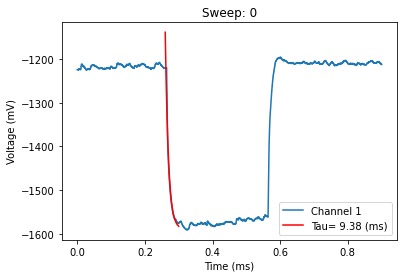

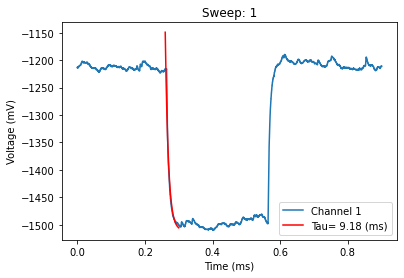

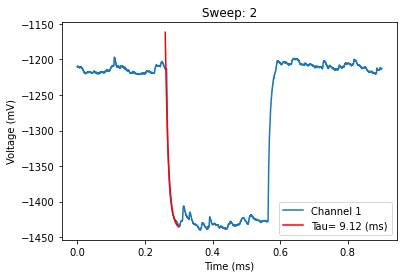

In [2464]:
#%% membrane time constant (TAU)

# plot the first channel
start = np.int(0.26 * sr) # ~ 10% to 20% OF OF THE MAXIMUM VOLTAGE DEFLECTION
end = np.int(0.30  * sr) # ADJUST THE NUMBER
pdf_pages_all = PdfPages('Membrane_time_constant_traces.pdf')
tau = [ ]
for i in range (0,3): # the number of sweeps in hyperpolarization steps
    abfL.setSweep(sweepNumber=i, channel=0)
    fig1 = plt.figure()
    plt.plot(abfL.sweepX, abfL.sweepY, label="Channel 1")

    popt, pcov = curve_fit(func_exp_1, abfL.sweepX[start:end], abfL.sweepY[start:end], maxfev = 10000)
    
    
    plt.plot(abfL.sweepX[start:end], func_exp_1(abfL.sweepX[start:end], *popt), 'r-',
    label='Tau=%5.2f (ms)' % (1e3*popt[1]))
    tau.append(1e3*popt[1])
    
    plt.title('Sweep: %d' %i)
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.legend()
    pdf_pages_all.savefig(fig1)
pdf_pages_all.close()

plt.savefig(os.path.join(save_path , 'Membrane_time_constant_traces.svg'))
plt.savefig(os.path.join(save_path , 'Membrane_time_constant_traces.pdf'))


In [2465]:
# Calculate Cm
# Remember that Ra and Rm in parallel so to combine them take the reciprocal of the sum of their reciprocals.


# tau = R * C
# C = tau / R
Cm = np.median(tau) /  membrane_resistance ## tauClamp / (1/(1/Ra + 1/Rm))
print(f"Cm: {Cm*1e3:f} pF")

Cm: 3.418258 pF


In [2466]:
#%% changing window size parameters
efel.setDoubleSetting('interp_step', 0.1)

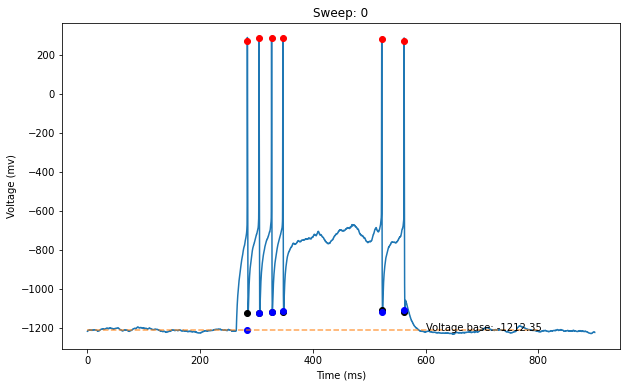

<Figure size 432x288 with 0 Axes>

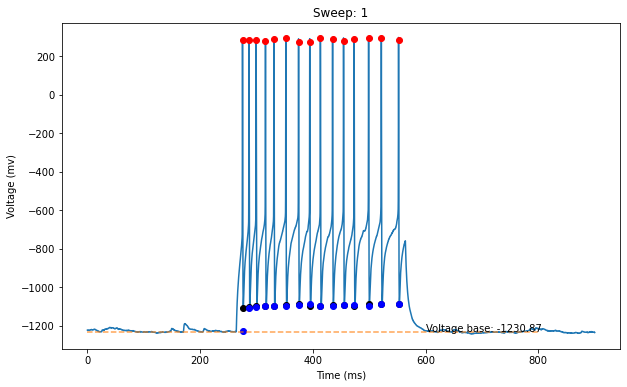

<Figure size 432x288 with 0 Axes>

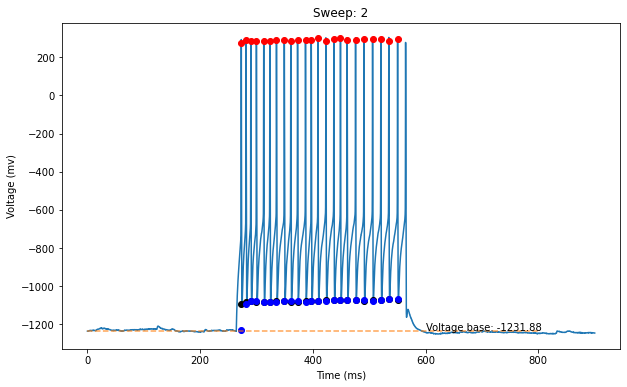

<Figure size 432x288 with 0 Axes>

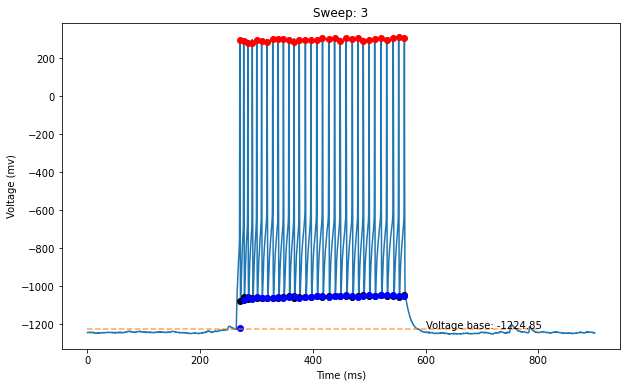

<Figure size 432x288 with 0 Axes>

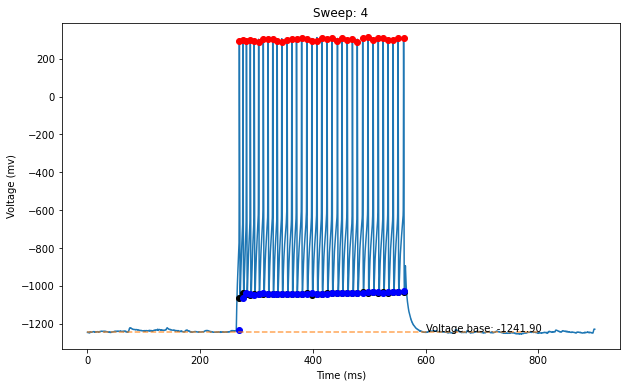

<Figure size 432x288 with 0 Axes>

In [2467]:
#%% AP p​ = [] # in (ms)
AHP = [] # in (mV)
AHP_slow = [] # in (mV)
AP_fall = [] # in (ms)
AP_rise = [] # in (ms)
ISI_CVV = []
ISI = []
adaptation_indexx = []
FWHM =[] # in (ms)
reset_threshold = []
AP_width = []
AP_peak = []

pdf_pages = PdfPages(os.path.join(save_path, 'APs.pdf'))
##### YOU HAVE TO KNOW from which trace we want to demonstrate
for idx,trace in enumerate(data[rheobase_sweep-1:]):
    
    # Let's set the stimulus_current of Efel, just in case we need it later
    current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
    efel.setDoubleSetting('stimulus_current', current_amplitude)
    
    # Get the e-features
    interesting_efeatures = ['peak_time','AP_amplitude', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                             'AP_begin_voltage', 'mean_frequency','ISI_CV','voltage_base','AHP_depth', 'AHP_time_from_peak', 
                             'AP_width', 'AP_height', 'AHP_depth_abs','AHP_time_from_peak','AP_fall_time',
                             'adaptation_index', 'AHP_depth_abs_slow','AP_rise_time', 'ISIs', 'AP1_peak']
    efel_trace = [{'T': trace['t'],
                   'V': trace['v'],
                   'stim_start': [ton],
                   'stim_end': [toff]}]
    fel_val = efel.getFeatureValues(efel_trace,
                                     interesting_efeatures,
                                     raise_warnings=False)

    

#     with PdfPages(os.path.join(save_path ,'APs.pdf')) as pdf:
    fig = plt.figure(figsize=(10, 6))
    plt.plot(trace['t'], trace['v'])
    try:
        for time in range (len(fel_val[0]['peak_time'])): 
            plt.plot(fel_val[0]['peak_time'][time], fel_val[0]['AP_height'][time], 'or')
          # plt.show()


        for time in range (len(fel_val[0]['AHP_depth_abs'])): 
            plt.plot(fel_val[0]['peak_time'][time], fel_val[0]['AHP_depth_abs'][time], 'ok')


        for time in range (len(fel_val[0]['peak_time'])): 
            plt.plot(fel_val[0]['peak_time'][time], fel_val[0]['AP_begin_voltage'][time], 'ob')





        for peak in fel_val[0]['voltage_base']:
            plt.plot([0,800], [peak, peak], ls='--', alpha=0.7, c='C1') # choose the line coordinates for voltage base
            plt.title('Sweep: %d' %idx)
            plt.xlabel('Time (ms)')
            plt.ylabel('Voltage (mv)')

            plt.annotate('Voltage base: %.2f' %(fel_val[0]['voltage_base'][0]), [600,fel_val[0]['voltage_base'][0]] )
            plt.show()
            plt.savefig(os.path.join(save_path ,"AP_lastSweep.svg")) 
            pdf_pages.savefig(fig)
#             plt.savefig(os.path.join(save_path ,"APs.pdf")) 
#             pdf.savefig(fig)

            # plt.savefig("/content/drive/My Drive/PFC_LC_1/21.05.2020/sEPSCs/" + "AP.svg") 
            # plt.savefig("/content/drive/My Drive/PFC_LC_1/21.05.2020/sEPSCs/Sweep" + str(idx) + "I_V_traces_params.png",) # saving individual file

            reset_thresholdd = (fel_val[0]['AP_begin_voltage'][0]) #in (mV)
            reset_threshold.append(reset_thresholdd)


            if (fel_val[0]['AP_begin_width']) is not None:
                AP_widthh = (fel_val[0]['AP_begin_width'][0]) # in (ms)
                AP_width.append(AP_widthh)
            else:
                pass
            if (fel_val[0]['AP_width']) is not None:
                FWHMM = (fel_val[0]['AP_width'][0]) # in (ms)
                FWHM.append(FWHMM)
            else:
                pass
            if (fel_val[0]['AHP_depth']) is not None:
                AHPh = (fel_val[0]['AHP_depth'][0]) # in (mV)
                AHP.append(AHPh)
            else:
                pass
            if (fel_val[0]['AHP_depth_abs_slow']) is not None:
                AHP_sloww = (fel_val[0]['AHP_depth_abs_slow'][0]) -fel_val[0]['voltage_base'][0] # in (mV)
                AHP_slow.append(AHP_sloww)
            else:
                pass

            if fel_val[0]['AP_fall_time'] is not None:
                AP_falll = (fel_val[0]['AP_fall_time'][0]) # in (ms)
                AP_fall.append(AP_falll)
            else:
                pass
            if fel_val[0]['AP_rise_time'] is not None:
                AP_risee = (fel_val[0]['AP_rise_time'][0]) # in (ms)
                AP_rise.append(AP_risee)
            else:
                pass
            if fel_val[0]['ISI_CV'] is not None:
                ISI_CVVv = (fel_val[0]['ISI_CV'])
                ISI_CVV.append(ISI_CVVv)
            else:
                pass
            if fel_val[0]['adaptation_index'] is not None:
                adaptation_indexxx = (fel_val[0]['adaptation_index']) #The adaptation index is zero for a constant firing rate and bigger than zero for a decreasing firing rate
                adaptation_indexx.append(adaptation_indexxx)
            else:
                pass
            if fel_val[0]['ISIs'] is not None:
                ISIs = np.mean(fel_val[0]['ISIs']) # in (ms)
                ISI.append(ISIs)
            else:
                pass
            if fel_val[0]['AP1_peak'] is not None:
                AP1_peaks = np.mean(fel_val[0]['AP1_peak']) # in (ms)
                AP_peak.append(AP1_peaks)
            else:
                pass
            # print(fel_val[0]['AP_begin_width'][1])
    except:
        pass
pdf_pages.close()
# pdf.close()


#### The parameters of the first AP
reset_threshold1 = reset_threshold[0] #in (mV)
AP_width1 = AP_width[0] # in (ms)
AHP1 = AHP[0] # in (mV)
if len(AHP_slow) == 0:
    AHP_slow1 = []# in (mV)
else:
    AHP_slow1 = AHP_slow[0] # in (mV)
    
AP_fall1 = AP_fall[0] # in (ms)
AP_rise1 = AP_rise[0] # in (ms)
if len(ISI_CVV) == 0:
    ISI_CVV1 = []
else:
    ISI_CVV1 = ISI_CVV[0]

if len(adaptation_indexx) == 0:
    adaptation_indexx1 = []
else:
    adaptation_indexx1 = adaptation_indexx[0][0]
FWHM1 =FWHM[0]# in (ms)
AP1_peak = AP_peak[0]


In [2468]:
reset_threshold1

-1211.5478515631203

<Figure size 1440x576 with 0 Axes>

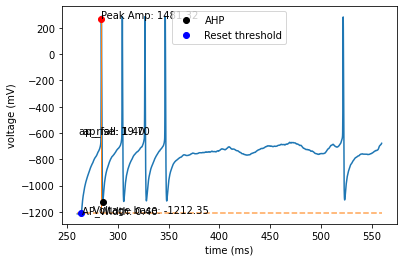

In [2469]:
#%% Single AP
# looking at one single example //// Define your sweep number
trace_num = rheobase_sweep-1  #### CHOOSE YOUR SWEEP NUMBER after Rheobase
Sweep_selected = fel_vals[trace_num]
# Define your window for a single AP

ton = 260.
toff = 560.
ton_idx = int(ton / dt / 1e3)
toff_idx = int(toff / dt / 1e3)



plt.figure(figsize=(20,8))


ap_rise = Sweep_selected['AP_rise_time'][0]
ap_fall = Sweep_selected['AP_fall_time'][0]
ahp_time_from_peak = Sweep_selected['AHP_time_from_peak'][0]
reset_threshold_ap = reset_threshold[0] #in (mV)
peak_time = Sweep_selected['peak_time'][0]
peak_voltage = Sweep_selected['peak_voltage'][0]
peak_amplitude = Sweep_selected['AP_amplitude'][0]
ap_begin_time = Sweep_selected['AP_begin_time'][0]
ap_width = Sweep_selected['AP_width'][0]
ap_begin_voltage = Sweep_selected['AP_begin_voltage'][0]
ap_height = Sweep_selected['AP_height'][0]

voltage_base = Sweep_selected['voltage_base'][0]
ap_amplitude = Sweep_selected['AP_amplitude'][0]
ahp_depth_abs = Sweep_selected['AHP_depth_abs'][0]

# time_spike_indices = np.where((time > 900) & (time < 930))
# time_spike = time[time_spike_indices]
# voltage_spike = voltage[time_spike_indices]

fig3, ax3 = plt.subplots(1)
#plot the ap
for trace in (data[trace_num:trace_num+1]):
    
    # Let's set the stimulus_current of Efel, just in case we need it later
    current_amplitude = np.median(trace['i'][ton_idx:toff_idx])
    efel.setDoubleSetting('stimulus_current', current_amplitude)
    

    efel_trace = [{'T': trace['t'],
                   'V': trace['v'],
                   'stim_start': [ton],
                   'stim_end': [toff]}]

plt.plot(trace['t'][ton_idx:toff_idx], trace['v'][ton_idx:toff_idx])

single_AP_time=trace['t'][ton_idx:toff_idx]
single_AP_voltage=trace['v'][ton_idx:toff_idx]








# ax3.plot(trace['t'][ton_idx:toff_idx], trace['v'][ton_idx:toff_idx])
#plot the ap amplitude AND HALF WIDTH
ax3.plot([peak_time, peak_time], [peak_voltage, peak_voltage - peak_amplitude], linewidth=1)
ax3.plot([ap_begin_time, ap_begin_time + ap_width], 
         [ap_begin_voltage, ap_begin_voltage], linewidth=4)

ax3.set_xlabel('time (ms)')
ax3.set_ylabel('voltage (mV)');


plt.plot([ton,toff], [voltage_base, voltage_base], ls='--', alpha=0.7, c='C1') # choose the line coordinates for voltage base
plt.plot(peak_time, ap_height, 'or')
plt.plot(peak_time+ahp_time_from_peak, ahp_depth_abs, 'ok', label='AHP') # AFTER HYPERPOLARIZATION AMPLITUDE
plt.plot(ap_begin_time, reset_threshold_ap, 'ob', label='Reset threshold') # reset_threshold_ap
# plt.plot(second_ap_begin_time - second_ap_width, second_ap_begin_voltage, 'oy') # spike threshold
plt.annotate('Voltage base: %.2f' %(voltage_base), [275,voltage_base])
plt.annotate('Peak Amp: %.2f' %(ap_amplitude), [peak_time,ap_height])
plt.annotate('AP_Width: %.2f' %(ap_width), [(ap_begin_time + 2*ap_width),ap_begin_voltage])
plt.annotate('ap_rise: %.2f' %(ap_rise), [(ap_begin_time - 5*ap_width),ap_begin_voltage - ap_begin_voltage/2 ])
plt.annotate('ap_fall: %.2f' %(ap_fall), [(ap_begin_time + 3*ap_width),ap_begin_voltage - ap_begin_voltage/2 ])
plt.legend()
plt.savefig(os.path.join(save_path ,'Single_AP_parameters.pdf'))
plt.savefig(os.path.join(save_path ,'Single_AP_parameters.svg'))




In [2470]:
#%% F_I CURVE////
stim_lin= 0.3 # the duration of the stimulus in seconds
firing_rates = []

for i in range (len(fel_vals)):
    firing_rate = fel_vals[i]['Spikecount'][0] / stim_lin
    print(fel_vals[i]['Spikecount'][0])
    firing_rates.append(firing_rate)
# firing_rates

0
0
0
0
0
0
0
0
0
0
0
6
15
24
31
35


In [2471]:
#%%
# m is the slope or the F_I Slope (Hz/nA); C is the itercept
def func(x,m,b):
    return np.multiply(m,x)+b

In [2472]:
# #%% Get the current steps in current clamp protocol
# # 10% OF Of THE TRACE (get these start and end valuse from pClamp)
# sr = abfL.dataRate    # SAMPLING rate for long aquare
# start = np.int(0.550 * sr) 
# end = np.int(0.564  * sr)
# initial = np.int(0.200  * sr) # baseline duration

# current_step=[]
# for i in range (abfL.sweepCount):
#    abfL.setSweep(sweepNumber=i, channel=1) # set the baseline based on above figure # the current channel
#    a = np.median(abfL.sweepY[start:end]) - np.median(abfL.sweepY[0:initial])
#    current_step.append(a)
# #current_step= current_step + leak_current
# print( current_step )
current_step=[-126.953125, -101.92871, -75.68359, -51.26953, -25.634766, 0.30517578, 
 24.414062, 50.354004, 75.68359, 100.70801, 125.73242, 152.58789, 177.6123, 203.24707, 228.88184, 253.90625]
print( current_step )


[-126.953125, -101.92871, -75.68359, -51.26953, -25.634766, 0.30517578, 24.414062, 50.354004, 75.68359, 100.70801, 125.73242, 152.58789, 177.6123, 203.24707, 228.88184, 253.90625]


In [2473]:
# #%% F_I CURVE////
# # coosing the hyperpolarization traces
# # decorate the plot
# start_trace = rheobase_sweep-1
# end_trace = end

# fig = px.scatter(x = current_step[0:end_trace],y = firing_rates[0:end_trace], labels={'x':'Current (pA)', 'y':'Spikes Frequency (Hz)'}, title="F_I Curve")

# popt, pcov = curve_fit(func, current_step[start_trace:end_trace], firing_rates[start_trace:end_trace])
# popt
# fig.add_trace(go.Scatter(x = current_step[start_trace:end_trace], y = func(current_step[start_trace:end_trace], *popt), mode='lines',
#     name='F_I Slope (gain)=%5.3f (HZ/nA)' % (popt[0] * 1e3),
#     marker=dict(
#         color='rgb(255, 0, 0)')))
# fig.show()
# # fig.write_image(os.path.join(save_path , 'F_I_Curve.pdf'))
# # fig.write_image(os.path.join(save_path , 'F_I_Curve.svg'))

# F_I_Slope = popt[0] *1e3 # this is the gain function or the neuronal excitability



In [2474]:
x_data = np.array(current_step, dtype="float64")
# x_data = np.delete(x_data, -3)
# x_data = np.delete(x_data, -4)
# x_data = np.delete(x_data, -1)
y_data = np.array(firing_rates, dtype="float64")
# y_data = np.delete(y_data, -3)
# y_data = np.delete(y_data, -4)
# y_data = np.delete(y_data, -1)

In [2475]:
#%% F_I CURVE////
# Here is a snap of how I learnt to fit Sigmoid Function - y = c/(1+np.exp(-a*(x-b))) and 3 coefficients [c, a, b]:

# * c - the maximum value (eventual maximum infected people, the sigmoid scales to this value eventually)
# * a - the sigmoidal shape (how the infection progress. The smaller, the softer the sigmoidal shape is)
# * b - the point where sigmoid start to flatten from steepening (the midpoint of sigmoid, when the rate of increase start to slow down)
# def sigmoid(x,c,a,b):
#      y = c*1 / (1 + np.exp(-a*(x-b)))
#      return y
def sigmoid(x, a, gain, theta):  # a is the multiplication factor, gain is the gain, theta is the threshold

    output = np.zeros(len(x))
#     output = signal.resample(x[x >=0], 10000)
#     print(f' before {output.shape = }')
    output[x>=0] = a / (1+np.exp(-gain * (x[x>=0]-theta))) 
#     output = a / (1+np.exp(-gain * (x-theta))) 
#     print(f' after {output.shape = }')
#    output = a / (1+np.exp(-c * (x-d))) 
    return output


#idx = yy_data > 0
#idx = yy_data > 0
#yy_data = yy_data[idx]

# from scipy import signal, interpolate


#idx = y_data > 0
#x_data = x_data[idx]
#y_data = y_data[idx]
#x_data = np.concatenate([-x_data,x_data])
#y_data = np.concatenate([np.flip(y_data),y_data])
# xx_data = signal.resample(x_data, 1000, domain='time')
# yy_data = signal.resample(y_data, 1000, domain='time')
# xx_data = np.linspace(min(x_data), max(x_data), 1000)
# a_BSpline = interpolate.make_interp_spline(x_data, y_data)
# yy_data = a_BSpline(xx_data)

# p0 = [1, 1e-5, np.median(x_data)]


# popt, pcov = curve_fit(sigmoid, x_data, y_data, method='trf', bounds=([0.,0., 0.],[max(y_data),1, np.median(x_data)]))
# popt, pcov = curve_fit(sigmoid, x_data, y_data, method='dogbox', maxfev =10000,
popt, pcov = curve_fit(sigmoid, x_data[y_data>=0], y_data[y_data>=0], method='trf', maxfev =10000,
                      bounds=([1,0., np.min(x_data)],[np.max(x_data), 1, np.max(x_data)])
                      )

fig = px.scatter(x = x_data, y = y_data , labels={'x':'Current (pA)', 'y':'Spikes Frequency (Hz)'}, title="F_I Curve",
                 size_max=55)

slops = np.gradient(sigmoid(x_data, *popt))
print (slops)
Spontaneous_slop = np.mean(slops[np.where(slops>0.01)[0][0]])   # slops[5] ## np.mean(slops) ## 5 is the index for spontaneous firing of LC neurons
mean_slop = np.mean(slops[np.where(y_data>0)[0][0]:]) # the mean slope of when the cell starts firing

fig.add_trace(go.Scatter(x = x_data, y = sigmoid(x_data, *popt), mode='lines',
    name='F_I Slope (gain)=%5.3f (HZ/pA)' % (Spontaneous_slop),
    marker=dict(
        color='rgb(255, 0, 0)')))



fig.add_annotation(x=x_data[np.where(y_data>0)[0][0]], y=sigmoid(x_data, *popt)[np.where(y_data>=0)[0][0]], 
            text=f"Gradient: {Spontaneous_slop:.2f}",
#             showarrow=True,
#             arrowhead=1,
#             arrowcolor="green",
#             arrowsize=2,
#             arrowwidth=1
#             yshift=20
                  )


fig.show()
# fig.write_image(os.path.join(save_path , 'F_I_Curve.pdf'))
# fig.write_image(os.path.join(save_path , 'F_I_Curve.svg'))

[ 0.      0.      0.     ... 29.2624 16.2744  9.3402]


### Phase plane Analysis

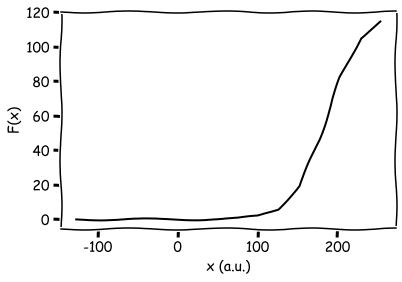

In [2476]:
def F(x, a, gain, theta):
  """
  Population activation function.

  Args:
    x (float): the population input
    a (float): the gain of the function
    theta (float): the threshold of the function

  Returns:
    float: the population activation response F(x) for input x
  """

  # Define the sigmoidal transfer function f = F(x)
#   f = np.zeros(len(x))
  f = a / (1+np.exp(-gain * (x-theta)))

  return f


# Set parameters
# pars = default_pars_single()  # get default parameters
x = x_data      # set the range of input

# Compute transfer function
f = F(x, *popt)


########
def plot_fI(x, f):
  plt.figure(figsize=(6, 4))  # plot the figure
  plt.plot(x, f, 'k')
  plt.xlabel('x (a.u.)', fontsize=14)
  plt.ylabel('F(x)', fontsize=14)
  plt.show()
#############
# Visualize
with plt.xkcd():
  plot_fI(x, f)

In [2477]:
def default_pars_single(**kwargs):
  pars = {}

  # Excitatory parameters
  pars['tau'] = 1.     # Timescale of the E population [ms]
  pars['a'] = popt[0]      # multiplication factor of the E population
  pars['gain'] = popt[1]      # Gain of the E population
  pars['theta'] = popt[2]   # Threshold of the E population

  # Connection strength
  pars['w'] = 0.  # E to E, we first set it to 0

  # External input
  pars['I_ext'] = 0.

  # simulation parameters
  pars['T'] = 300.       # Total duration of simulation [ms]
  pars['dt'] = np.inf       # Simulation time step [ms]
  pars['r_init'] = 0.2  # Initial value of E

  # External parameters if any
  pars.update(kwargs)

  # Vector of discretized time points [ms]
  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

  return pars

pars = default_pars_single()
print(pars)

{'tau': 1.0, 'a': 119.11300264859202, 'gain': 0.04806205023007547, 'theta': 186.73217282764648, 'w': 0.0, 'I_ext': 0.0, 'T': 300.0, 'dt': inf, 'r_init': 0.2, 'range_t': array([0.])}


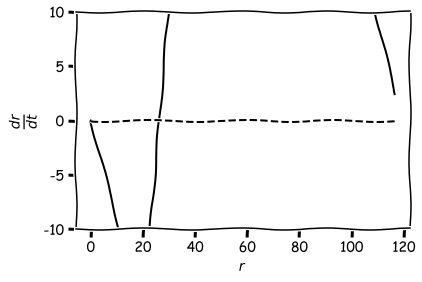

In [2478]:
def compute_drdt(r, I_ext, w, a, gain, theta, tau, **other_pars):
  """Given parameters, compute dr/dt as a function of r.

  Args:
    r (1D array) : Average firing rate of the excitatory population
    I_ext, w, a, theta, tau (numbers): Simulation parameters to use
    other_pars : Other simulation parameters are unused by this function

  Returns
    drdt function for each value of r
  """
  # Calculate drdt
  drdt = (-r + F(w * r + I_ext, a, gain, theta)) / tau

  return drdt


# Define a vector of r values and the simulation parameters
r = y_data
pars = default_pars_single(I_ext=-100, w=10)

# Compute dr/dt
drdt = compute_drdt(r, **pars)


#####
def plot_dr_r(r, drdt, x_fps=None):
    fig = plt.figure()
    plt.plot(r, drdt, 'k')
    plt.plot(r, 0. * r, 'k--')
    if x_fps is not None:
      plt.plot(x_fps, np.zeros_like(x_fps), "ko", ms=12)
    plt.xlabel(r'$r$')
    plt.ylabel(r'$\frac{dr}{dt}$', fontsize=20)
    plt.ylim(-10, 10)
    plt.show()
    return fig
#######

# Visualize
with plt.xkcd():
  plot_dr_r(r, drdt)

# plot_dr_r(r, drdt)

In [2479]:
# @markdown *Execute this cell to enable the fixed point functions*


def my_fp_single(r_guess, a, gain, theta, w, I_ext, **other_pars):
  """
  Calculate the fixed point through drE/dt=0

  Args:
    r_guess  : Initial value used for scipy.optimize function
    a, theta, w, I_ext : simulation parameters

  Returns:
    x_fp    : value of fixed point
  """
  # define the right hand of E dynamics
  def my_WCr(x):
    r = x
    drdt = (-r + F(w * r + I_ext, a, gain,  theta))
    y = np.array(drdt)

    return y

  x0 = np.array(r_guess)
  x_fp = opt.root(my_WCr, x0).x.item()

  return x_fp


def check_fp_single(x_fp, a, gain, theta, w, I_ext, mytol=1e-4, **other_pars):
  """
   Verify |dr/dt| < mytol

  Args:
    fp      : value of fixed point
    a, theta, w, I_ext: simulation parameters
    mytol   : tolerance, default as 10^{-4}

  Returns :
    Whether it is a correct fixed point: True/False
  """
  # calculate Equation(3)
  y = x_fp - F(w * x_fp + I_ext, a, gain,  theta)

  # Here we set tolerance as 10^{-4}
  return np.abs(y) < mytol


def my_fp_finder(pars, r_guess_vector, mytol=1e-4):
  """
  Calculate the fixed point(s) through drE/dt=0

  Args:
    pars    : Parameter dictionary
    r_guess_vector  : Initial values used for scipy.optimize function
    mytol   : tolerance for checking fixed point, default as 10^{-4}

  Returns:
    x_fps   : values of fixed points

  """
  x_fps = []
  correct_fps = []
  for r_guess in r_guess_vector:
    x_fp = my_fp_single(r_guess, **pars)
    if check_fp_single(x_fp, **pars, mytol=mytol):
      x_fps.append(x_fp)

  return x_fps

help(my_fp_finder)

Help on function my_fp_finder in module __main__:

my_fp_finder(pars, r_guess_vector, mytol=0.0001)
    Calculate the fixed point(s) through drE/dt=0
    
    Args:
      pars    : Parameter dictionary
      r_guess_vector  : Initial values used for scipy.optimize function
      mytol   : tolerance for checking fixed point, default as 10^{-4}
    
    Returns:
      x_fps   : values of fixed points



In [2480]:
# @title

# @markdown Make sure you execute this cell to enable the widget!

import ipywidgets as widgets       # interactive display
def plot_intersection_single(w, I_ext):
  # set your parameters
  pars = default_pars_single(w=w, I_ext=I_ext)

  # find fixed points
  r_init_vector = [0, 15, 30]
  x_fps = my_fp_finder(pars, r_init_vector)

  # plot
  r = y_data
  drdt = (-r + F(w * r + I_ext, pars['a'], pars['gain'], pars['theta'])) / pars['tau']

  plot_dr_r(r, drdt, x_fps)

_ = widgets.interact(plot_intersection_single, w=(1, 100, 2),
                     I_ext=(-200, 200, 10))

interactive(children=(IntSlider(value=49, description='w', min=1, step=2), IntSlider(value=0, description='I_e…

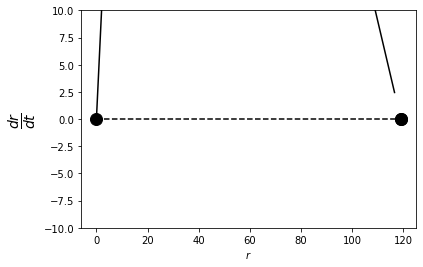

In [2481]:
# to_remove solution

# Set parameters
r = y_data
pars = default_pars_single(I_ext=-150, w=50)

# Compute dr/dt
drdt = compute_drdt(r, **pars)

# Initial guesses for fixed points
r_guess_vector = [0, 15, 30]

# Find fixed point numerically
x_fps = my_fp_finder(pars, r_guess_vector)

# Visualize
# with plt.xkcd():
#   fig = plot_dr_r(r, drdt, x_fps)
fig = plot_dr_r(r, drdt, x_fps)

fig.savefig(os.path.join(save_path , 'fixed_points.pdf'))
fig.savefig(os.path.join(save_path , 'fixed_points.svg'))# to_remove solution



In [2482]:
# import numpy as np
# from scipy import optimize
# import matplotlib.pyplot as plt
# def sigmoid(x, a, b, c,d):
#     output = np.zeros(len(x))
#     output[x > 0] = a / (1+np.exp(-c * (x[x>0]-d))) * b
#     return output 



# x=np.arange(-100, 100, step = .1)
# plt.plot(x,sigmoid(x,1,1,1,1))

In [2483]:
#%% Voltage Deflection___VOLTAGE BASE
#Get the voltage base
sr = abfL.dataRate   # SAMPLING rate in Hz
start = np.int(0.240 * sr) # 10% OF OF THE baseline
end = np.int(0.250  * sr)

voltage_base=[]
for i in range (abfL.sweepCount):
   abfL.setSweep(sweepNumber=i, channel=0) # set the baseline based on above figure
   a = np.median(abfL.sweepY[start:end])
   voltage_base.append(a)
# voltage_base = np.mean(voltage_base)
print(voltage_base)

[-1210.9375, -1221.3135, -1209.1064, -1209.1064, -1214.5996, -1218.8721, -1221.6187, -1224.3652, -1215.21, -1220.7031, -1212.1582, -1210.9375, -1231.0791, -1234.1309, -1231.0791, -1244.5068]


In [2484]:
#%% Voltage deflection
sr = abfL.dataRate   # SAMPLING rate in Hz
start = np.int(0.530 * sr) # 10% OF OF THE baseline
end = np.int(0.564  * sr)
sweepcount = 3
voltage_deflection=[]
for i in range (sweepcount):
   abfL.setSweep(sweepNumber=i, channel=0) # set the baseline based on above figure
   a = np.median(abfL.sweepY[start:end])
   voltage_deflection.append(a)
print(voltage_deflection)

[-1563.1104, -1485.5957, -1427.6123]


In [2485]:
#%% Sag amplitude 
# NOTE : YOU SHOULD ONLY TAKE TRACES WITH POSITIVE VALUES WHICH MEN THERE IS A SAG AMPLITUDE
sr = abfL.dataRate   # SAMPLING rate in Hz
start = np.int(0.263 * sr) # 10% OF OF THE baseline
end = np.int(0.300  * sr)
sweepcount = 3

sag_amplitude=[]
for i in range (sweepcount):
    abfL.setSweep(sweepNumber=i, channel=0) # set the baseline based on above figure
    a = np.min(abfL.sweepY[start:end])
    sag_amplitude.append(a)
print(sag_amplitude)

[-1575.9277, -1500.8545, -1433.7158]


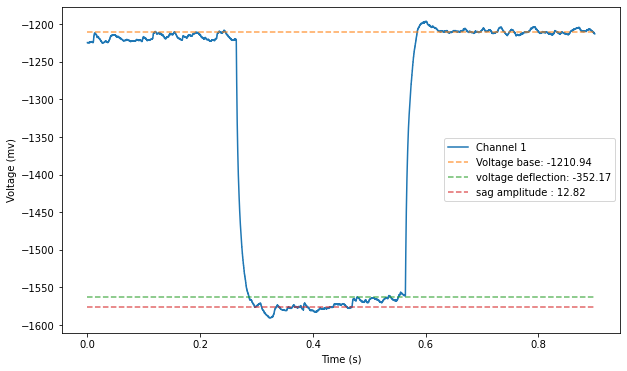

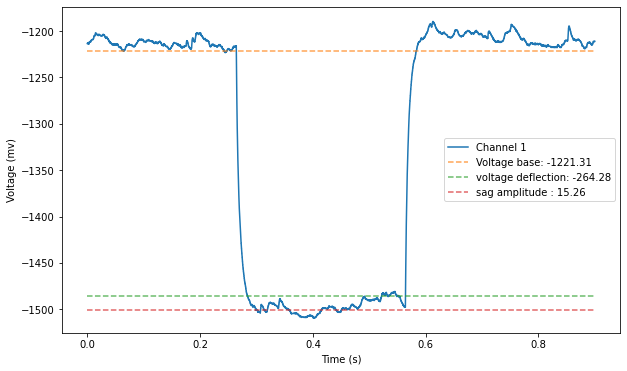

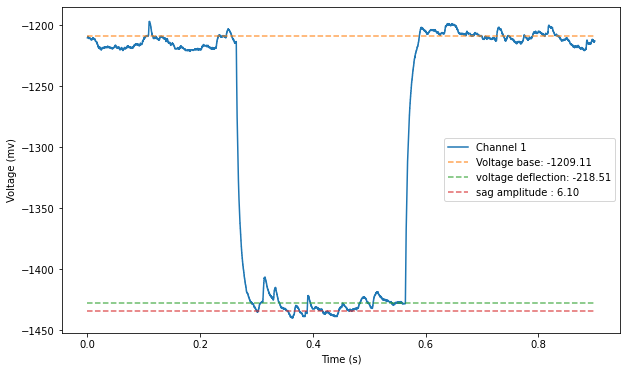

In [2486]:
#%% plotting the voltage deflection + voltage base + sag amplitude
pdf_pages_all = PdfPages(os.path.join(save_path, 'Membrane_base_deflection.pdf'))
for i in range (0,3):
    fig, ax = plt.subplots(figsize=(10, 6))
    abfL.setSweep(sweepNumber=i, channel=0)
    ax.plot(abfL.sweepX, abfL.sweepY, label="Channel 1")
    plt.ylabel('Voltage (mv)')
    plt.xlabel('Time (s)')
            
    plt.plot([np.min(abfL.sweepX), np.max(abfL.sweepX)], [voltage_base[i] , 
                                                        voltage_base[i]] , ls='--', alpha=0.7, c='C1', 
             label= 'Voltage base: %.2f' % voltage_base[i])

    
    plt.plot([np.min(abfL.sweepX),np.max(abfL.sweepX)], [voltage_deflection[i] , 
                                                       voltage_deflection[i]] , ls='--', alpha=0.7, c='C2', 
             label= 'voltage deflection: %.2f' % (voltage_deflection[i]- voltage_base[i]))
    
    plt.plot([np.min(abfL.sweepX),np.max(abfL.sweepX)], [sag_amplitude[i] , 
                                                        sag_amplitude[i]] , ls='--', alpha=0.7, c='C3', 
              label= 'sag amplitude : %.2f' % (voltage_deflection[i]- sag_amplitude[i]))

    pdf_pages_all.savefig(fig)
    plt.legend()

pdf_pages_all.close()
plt.savefig(os.path.join(save_path , 'Membrane_base_deflection.svg'))
# plt.savefig(os.path.join(save_path , 'Membrane_base_deflection.pdf'))
sag_amplitudes = -(np.mean(list(np.array(sag_amplitude) - np.array(voltage_deflection))))


In [2487]:
sag_amplitudes

11.3932295

In [2488]:
# #%%looking at the data of Ramp
# for i in range (0,1): # the number of sweeps in hyperpolarization steps
#     fig, ax = plt.subplots(2)
#     abfR.setSweep(sweepNumber=i, channel=0)
#     ax[0].plot(abfR.sweepX, abfR.sweepY, label="Channel 0")
#     abfR.setSweep(sweepNumber=i, channel=1)
#     ax[1].plot(abfR.sweepX, abfR.sweepY, label="Channel 1")

In [2489]:
# ## current step for ramp trace

# #Get the current steps in current clamp protocol
# sr = abfR.dataRate    # SAMPLING rate

# start = np.int(0.001 * sr) 
# duration = 11000 # the duration of your trace

# current_step=[]
# # for i in range (abf.sweepCount):
# for i in range(1,duration,1):
#    # abf.setSweep(sweepNumber=i, channel=1) # set the baseline based on above figure # the current channel
#    abfR.setSweep(sweepNumber=0,channel=1)
#    a = np.median(abfR.sweepY[start*i:start*(i+1)])
#    current_step.append(a)

# # current_step = (current_step-current_step[0]).tolist() # convert pA to nA
# # print(current_step)

In [2490]:
# #%% voltage step for ramp trace

# # 10% OF OF THE TRACE (gwt these start and end valuse from pClamp)
# start = np.int(0.001 * sr)  


# voltage_step=[]
# # for i in range (abf.sweepCount):
# for i in range(1,duration,1):
#    # abf.setSweep(sweepNumber=i, channel=1) # set the baseline based on above figure # the current channel
#    abfR.setSweep(sweepNumber=0,channel=0)
#    a = np.median(abfR.sweepY[start*i:start*(i+1)])
#    voltage_step.append(a)

# # current_step = (current_step-current_step[0]).tolist() # convert pA to nA
# # print(current_step)


In [2491]:
# #%% Finding the turning point or the threshold
# import numpy as np
# from matplotlib import pyplot as plt
# from scipy.signal import savgol_filter
# # generate some toy data
# # n = 600
# t = np.array(current_step)
# y = np.array(voltage_step)

# # # get the gradient
# dy = np.gradient(y)

# # # search gradient for first occurrence of thresh value:
# thresh = 1 # define the threshold

# y_filtered = savgol_filter(y, 11, 3)
# dy_f = np.gradient(y_filtered)
# idx_thresh = np.argmax(dy_f > thresh)
# turning_point_ramp= y[idx_thresh]
# print(turning_point_ramp)

# fig, ax = plt.subplots(2)

# abfR.setSweep(sweepNumber=0, channel=0)
# ax[0].plot(abfR.sweepX, abfR.sweepY,  label = 'I-V Ramp')
# ax[0].set(xlabel="Time (s)", ylabel="Voltage (mV)")
# # ax[0].set_ylabel('Voltage (mV)')
# ax[0].legend(loc='upper left', )
# # plt.plot(t, dy_f, 'g', label='gradient turning point = %5.2f (mV)' % (turning_point_ramp),linewidth=0.3)
# ax[1].plot(t[idx_thresh:], y[idx_thresh:], 'r', label='I-V Ramp > threshold', linewidth=0.3)
# ax[1].set_xlim([t[0], t[-1]])
# ax[1].axhline(y=turning_point_ramp, color='b', linestyle='--', label= 'Threshold= GTP = %5.2f (mV)' % (turning_point_ramp))
# ax[1].set_xlabel('Current (pA)')
# ax[1].set_ylabel('Voltage (mV)')
# ax[1].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
# fig.tight_layout()

# plt.savefig(os.path.join(save_path ,'I_V_Curve_ramp.svg'))
# plt.savefig(os.path.join(save_path ,'I_V_Curve_ramp.pdf'))




In [2492]:
################################
#%% Exporting data to Excell for analysis
writer = pd.ExcelWriter(os.path.join(save_path, file_L +'.xlsx'))

# pd.DataFrame({'turning_point_ramp (mV)': 
#              [turning_point_ramp]}).to_excel(writer,sheet_name = 
#                                               'Ramp', startcol=0,index=False)


pd.DataFrame({'leak_current (pA)': 
              [leak_current]}).to_excel(writer,sheet_name = 
                                               'LongSquare', startcol=0,index=False)
pd.DataFrame({'Rheobase_long (pA)': 
              [Rheobase_long]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=1, index=False)
# pd.DataFrame({'Rheobase_short (pA)': 
#               [Rheobase_short]}).to_excel(writer,sheet_name = 
#                                                 'LongSquare', startcol=2, index=False)
pd.DataFrame({'reset_threshold (mv)': 
              [reset_threshold1]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=3, index=False)
pd.DataFrame({'F_I_Slope Hz/pA)': 
              [Spontaneous_slop]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=4, index=False)

pd.DataFrame({'Mean F_I_Slope Hz/pA)': 
              [mean_slop]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=5, index=False)

pd.DataFrame({'tau (ms)': 
              [np.median(tau)]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=6, index=False)
pd.DataFrame({'membrane_resistance (Mohm))': 
              [membrane_resistance]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=7, index=False)

pd.DataFrame({'Capacitance (pF)': 
              [Cm*1e3]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=8, index=False)
# pd.DataFrame({'Capacitance_observed (pF)': 
#               [Capacitance_observed]}).to_excel(writer,sheet_name = 
#                                                 'LongSquare', startcol=9, index=False)
pd.DataFrame({'sag_amplitude_IV (mV)': 
              [sag_amplitudes]}).to_excel(writer,sheet_name = 
                                                'LongSquare', startcol=10, index=False) 


                                                  
pd.DataFrame({'AP_width (ms)': 
              [AP_width1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=0, index=False) 
pd.DataFrame({'AHP (mV)': 
              [AHP1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=1, index=False) 
pd.DataFrame({'AHP_slow (mV)': 
              [AHP_slow1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=2, index=False) 
pd.DataFrame({'AP_fall (ms)': 
              [AP_fall1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=3, index=False) 
pd.DataFrame({'AP_rise (ms)': 
              [AP_rise1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=4, index=False)   
pd.DataFrame({'ISI_CVV': 
              ISI_CVV1}).to_excel(writer,sheet_name = 
                                                'AP', startcol=5, index=False) 
pd.DataFrame({'adaptation_indexx': 
              [adaptation_indexx1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=6, index=False) 
pd.DataFrame({'FWHM (ms)': 
              [FWHM1]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=7, index=False) 
pd.DataFrame({'resting_potential (mV)': 
              [resting_potential]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=8, index=False) 
pd.DataFrame({'AP_peak (mV)': 
              [np.mean(AP_peak)]}).to_excel(writer,sheet_name = 
                                                'AP', startcol=9, index=False)                                                  
                                                
                                                




pd.DataFrame({'current_step (pA)': 
              current_step}).to_excel(writer,sheet_name = 
                                               'F_I', startcol=0,index=False)
pd.DataFrame({'firing_rates (Hz)': 
              firing_rates}).to_excel(writer,sheet_name = 
                                               'F_I', startcol=1,index=False)



pd.DataFrame({'ISI': 
              ISI}).to_excel(writer,sheet_name = 
                                               'ISIs', startcol=0,index=True)
                                                'F_I', startcol=1,index=False)

writer.save()

